# importation de la bibliothèque et charger les données

In [1]:
# Importation de la bibliothèque
import pandas as pd 

# Chargement du fichier CSV
data = pd.read_csv("C:/Users/anass/Desktop/projet_world_happiness/world_happiness.csv", delimiter=';')

# Créer une frame de données.
df = pd.DataFrame(data)
df.head()

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015


# explorer les données

In [2]:
# la somme des valeurs dupliquées
df.duplicated().sum()

np.int64(0)

In [3]:
# afficher les fréquences des valeurs nulles
(df.isna().sum() / len(df)) * 100

Ranking                         0.000000
Country                         0.000000
Regional indicator              0.199734
Happiness score                 0.000000
GDP per capita                  0.000000
Social support                  0.000000
Healthy life expectancy         0.000000
Freedom to make life choices    0.000000
Generosity                      0.000000
Perceptions of corruption       0.000000
Year                            0.000000
dtype: float64

<Axes: >

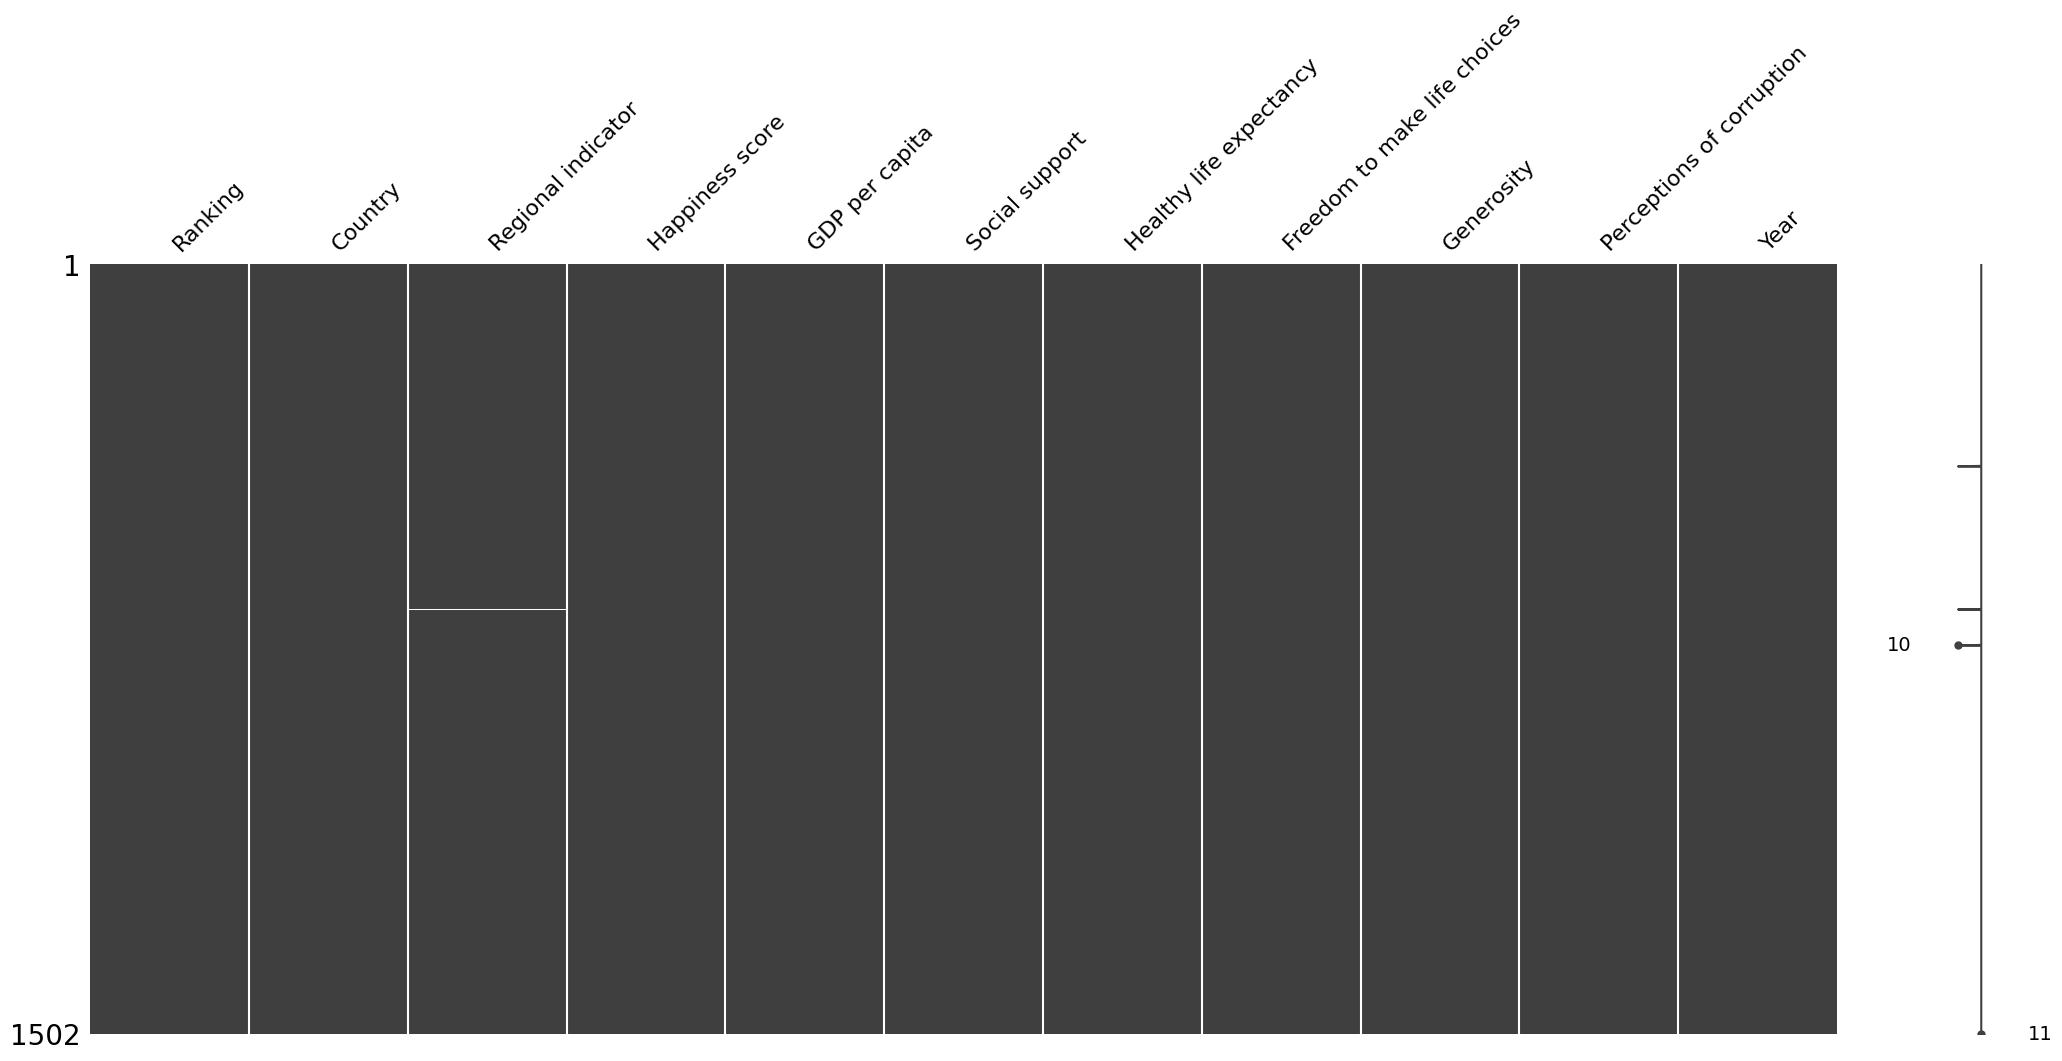

In [4]:
# importer la bib missingno
import missingno as msno

# afficher le lieu des valeurs nulles dans les données
msno.matrix(df)

<Axes: >

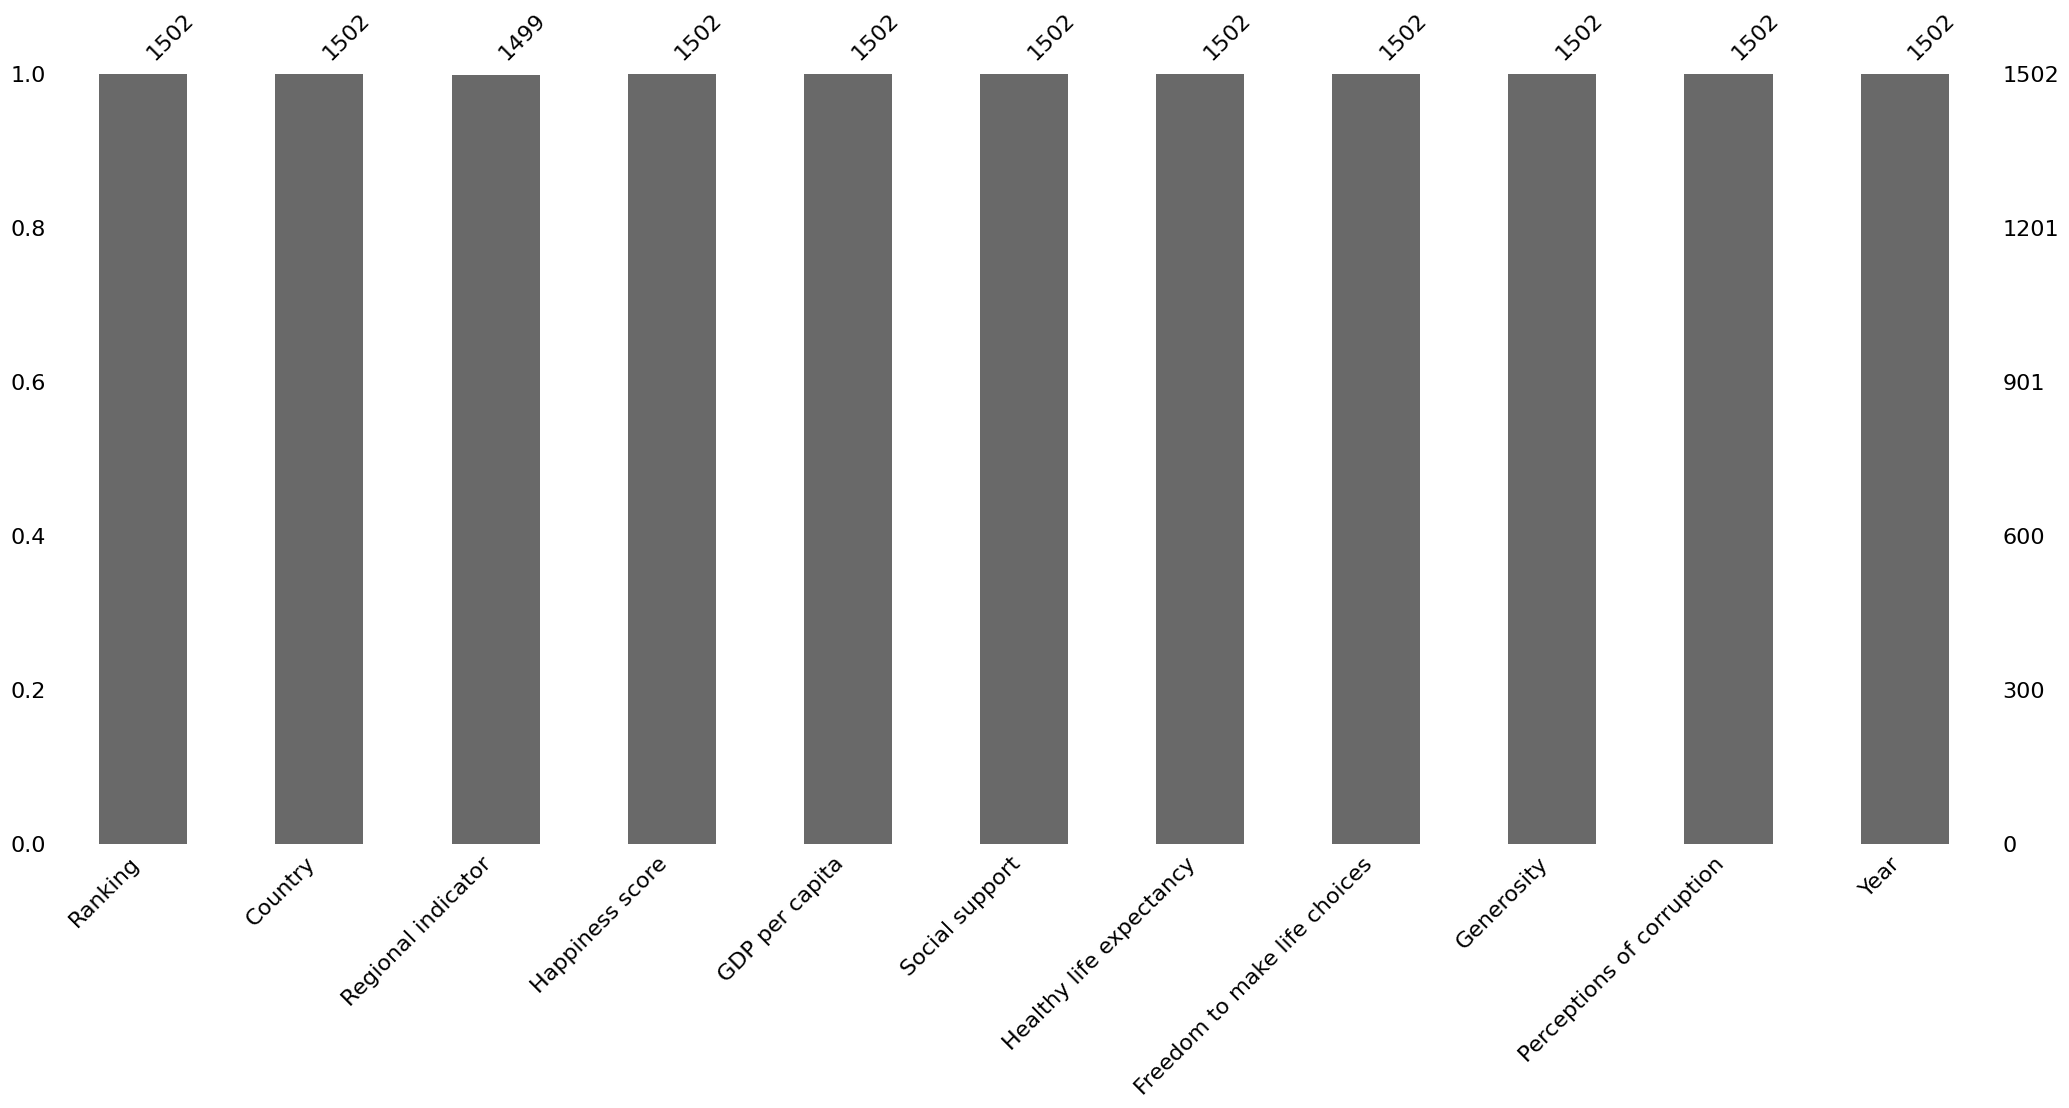

In [5]:
# afficher le nombre des valeurs non nulles
msno.bar(df)

In [6]:
# Comptage du nombre d'occurrences de chaque valeur dans la colonne 'Year'.
df['Year'].value_counts()


Year
2015    158
2016    157
2017    155
2018    155
2019    155
2020    152
2021    148
2022    145
2024    140
2023    137
Name: count, dtype: int64

# Identification des Pays Apparaissant Plus de 2 Fois par Année

In [7]:
# Grouper par 'Country' et 'Year', puis compter les occurrences
country_year_counts = df.groupby(['Country', 'Year']).size().reset_index(name='Count')

# Filtrer les lignes où 'Count' > 1
filtered_country_year_counts = country_year_counts[country_year_counts['Count'] > 1]

# Afficher le DataFrame filtré
filtered_country_year_counts

,Country,Year,Count


# Filtrage des pays apparaissant une fois par an de 2015 à 2025 (10 années au total)

In [8]:
# Calculer le nombre d'occurrences de chaque pays
country_counts = df['Country'].value_counts()

# Filtrer les pays qui apparaissent exactement 10 fois
countries_to_keep = country_counts[country_counts == 10].index

# Garder uniquement les lignes où le pays est dans 'countries_to_keep'
df = df[df['Country'].isin(countries_to_keep)]

# Afficher le DataFrame après suppression
df

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015
...,...,...,...,...,...,...,...,...,...,...,...
1496,47,Uzbekistan,Commonwealth of Independent States,"6,19500","5,66075","0,86264",71,"0,96713","0,62743","0,37326",2024
1497,78,Venezuela,Latin America and Caribbean,"5,60670","0,00000","0,81740",70,"0,59990","0,47969","0,14982",2024
1498,54,Vietnam,Southeast Asia,"6,04300","6,21579","0,78378",71,"0,97594","0,23369","0,27818",2024
1500,131,Zambia,Sub-Saharan Africa,"3,50240","4,19978","0,50041",63,"0,84216","0,41825","0,19012",2024


# Supprimer les lignes qui ont cette valeur incorrecte 

In [9]:
# Supprimer les lignes où 'Country' est 'Israel'
df = df[df['Country'] != 'Israel'] 

In [10]:
# Comptage du nombre d'occurrences de chaque valeur dans la colonne 'Year'.
df['Year'].value_counts()

Year
2015    120
2016    120
2017    120
2018    120
2019    120
2020    120
2021    120
2022    120
2023    120
2024    120
Name: count, dtype: int64

# remplacer les valeurs nulles dan la colonne "Regional indicator"

In [11]:
# Afficher les lignes qui indiquent les valeurs NAN dans la colonne 'Indicateur régional'.
df[df['Regional indicator'].isna()]

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
394,87,Greece,NaN,"5,22700","6,89283","0,76955",71,"0,14543","0,00000","0,09324",2017
673,49,Cyprus,NaN,"6,04580","7,50051","0,75329",77,"0,64287","0,33664","0,08973",2019


In [12]:
# Les lignes Exposition la valeur de Cyprus dans la colonne 'Country'
df[df['Country'] == 'Cyprus']

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
66,67,Cyprus,Western Europe,"5,68900","7,14692","0,63697",72,"0,60729","0,38496","0,88864",2015
304,69,Cyprus,Western Europe,"5,54600","9,93412","0,59748",78,"0,48492","0,34044","0,10348",2016
419,65,Cyprus,Western Europe,"5,62100","7,24804","0,70246",72,"0,53948","0,32366","0,08882",2017
505,61,Cyprus,Middle East and North Africa,"5,76250","7,45164","0,74516",73,"0,58353","0,33886","0,07654",2018
673,49,Cyprus,NaN,"6,04580","7,50051","0,75329",77,"0,64287","0,33664","0,08973",2019
824,45,Cyprus,Western Europe,"6,15900","7,89236","0,74257",74,"0,66264","0,40001","0,90396",2020
963,39,Cyprus,Western Europe,"6,22350","7,86375","0,65284",74,"0,64801","0,32932","0,88900",2021
1110,41,Cyprus,Sub-Saharan Africa,"6,22090","8,21521","0,68892",81,"0,60557","0,26356","0,10528",2022
1270,46,Cyprus,Sub-Saharan Africa,"6,13000","8,29006","0,75600",73,"0,59029","0,24724","0,91149",2023
1391,50,Cyprus,Western Europe,"6,06810","8,38021","0,75284",78,"0,61250","0,31061","0,08551",2024


In [13]:
# Les lignes Exposition la valeur de Greece dans la colonne 'Country'
df[df['Country'] == 'Greece'] 

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
101,102,Greece,Western Europe,"4,85700","6,82708","0,66275",71,"0,11495","0,00000","0,97469",2015
288,99,Greece,Western Europe,"5,03300","9,97503","0,63784",76,"0,09568","0,00000","0,08169",2016
394,87,Greece,NaN,"5,22700","6,89283","0,76955",71,"0,14543","0,00000","0,09324",2017
520,79,Greece,Western Europe,"5,35790","6,99674","0,69967",72,"0,18072","0,00000","0,09730",2018
705,82,Greece,Middle East and North Africa,"5,28670","7,01463","0,71213",76,"0,10625","0,00000","0,07604",2019
855,77,Greece,Middle East and North Africa,"5,51500","7,34098","0,75536",72,"0,25029","0,00000","0,90839",2020
979,68,Greece,Middle East and North Africa,"5,72260","7,27059","0,69218",73,"0,33994","0,00000","0,86448",2021
1127,58,Greece,Middle East and North Africa,"5,94820","7,70827","0,74276",80,"0,33669","0,03189","0,18461",2022
1282,58,Greece,Middle East and North Africa,"5,93090","7,76334","0,76983",71,"0,32130","0,01872","0,82647",2023
1408,63,Greece,Middle East and North Africa,"5,93360","7,86686","0,78940",76,"0,39053","0,04532","0,16097",2024


In [14]:
# Met à jour la colonne 'Regional indicator' à 'Europe' pour les pays 'Greece' et 'Cyprus'.
df.loc[df['Country'].isin(['Greece', 'Cyprus']), 'Regional indicator'] = 'Europe'

# Affiche les lignes où la colonne 'Country' est 'Cyprus' ou 'Greece'.
df[df['Country'].isin(['Cyprus', 'Greece'])]

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
66,67,Cyprus,Europe,"5,68900","7,14692","0,63697",72,"0,60729","0,38496","0,88864",2015
101,102,Greece,Europe,"4,85700","6,82708","0,66275",71,"0,11495","0,00000","0,97469",2015
288,99,Greece,Europe,"5,03300","9,97503","0,63784",76,"0,09568","0,00000","0,08169",2016
304,69,Cyprus,Europe,"5,54600","9,93412","0,59748",78,"0,48492","0,34044","0,10348",2016
394,87,Greece,Europe,"5,22700","6,89283","0,76955",71,"0,14543","0,00000","0,09324",2017
419,65,Cyprus,Europe,"5,62100","7,24804","0,70246",72,"0,53948","0,32366","0,08882",2017
505,61,Cyprus,Europe,"5,76250","7,45164","0,74516",73,"0,58353","0,33886","0,07654",2018
520,79,Greece,Europe,"5,35790","6,99674","0,69967",72,"0,18072","0,00000","0,09730",2018
673,49,Cyprus,Europe,"6,04580","7,50051","0,75329",77,"0,64287","0,33664","0,08973",2019
705,82,Greece,Europe,"5,28670","7,01463","0,71213",76,"0,10625","0,00000","0,07604",2019


In [13]:
# afficher les fréquences des valeurs nulles 
(df.isna().sum() / len(df)) * 100

Ranking                         0.000000
Country                         0.000000
Regional indicator              0.166667
Happiness score                 0.000000
GDP per capita                  0.000000
Social support                  0.000000
Healthy life expectancy         0.000000
Freedom to make life choices    0.000000
Generosity                      0.000000
Perceptions of corruption       0.000000
Year                            0.000000
dtype: float64

# Réattribution d'un Classement Incrémental par Année

In [14]:
# Trier le DataFrame par année (Year) et par les valeurs de la colonne à trier (par exemple, 'Ranking')
df = df.sort_values(by=['Year', 'Ranking'], ascending=[True, True])

# Réattribuer un nouveau classement (ranking) pour chaque année
df['Ranking'] = df.groupby('Year').cumcount() + 1

# Afficher le DataFrame mis à jour
df

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015
...,...,...,...,...,...,...,...,...,...,...,...
1375,116,Botswana,Sub-Saharan Africa,"3,38340","6,74926","0,59919",62,"0,65642","0,03599","0,14271",2024
1501,117,Zimbabwe,Sub-Saharan Africa,"3,34110","3,49606","0,52587",62,"0,56401","0,23983","0,22708",2024
1474,118,Sierra Leone,Sub-Saharan Africa,"3,24520","3,05663","0,35012",63,"0,54328","0,45249","0,09268",2024
1433,119,Lebanon,Middle East and North Africa,"2,70650","6,43174","0,35676",72,"0,20065","0,16876","0,05003",2024


In [17]:
# Sauvegarde le DataFrame 'df' sous forme de fichier CSV à l'emplacement spécifié.
df.to_csv("C:/Users/anass/Desktop/projet_world_happiness/world_happiness_Cleaning.csv")